In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [3]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3265/1511047806.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,19,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
1,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,9,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Night
2,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,21,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
3,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,45,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Night
4,20243023,Qld,4,2024,Friday,01:00,Single,No,No,No,...,24,Outer Regional Australia,Cairns,Cairns,Local Road,No,No,17_to_25,Weekday,Night


In [6]:
data['Gender'].value_counts()

Male           40208
Female         15786
-9                28
U                  2
M                  1
Unspecified        1
Name: Gender, dtype: int64

Optimized Code 

00:34:43 - cmdstanpy - INFO - Chain [1] start processing
00:34:43 - cmdstanpy - INFO - Chain [1] done processing
00:34:43 - cmdstanpy - INFO - Chain [1] start processing
00:34:43 - cmdstanpy - INFO - Chain [1] done processing
00:34:43 - cmdstanpy - INFO - Chain [1] start processing
00:35:01 - cmdstanpy - INFO - Chain [1] done processing


Skipping Unspecified due to insufficient data.
Skipping M  due to insufficient data.
Skipping U due to insufficient data.
Evaluation Metrics for the Test Period (2023) - Gender:
Female - MAE: 3.85, MSE: 26.16, MAPE: 13.59%, R2: -0.19
Forecast vs Actual for first three months of 2024 for Female:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  21.739357    8.910949   33.898872
421 2024-02-01  18.798907    6.248285   30.073364
422 2024-03-01  25.513330   12.949111   37.075674
        Date  Counts
0 2024-01-01      21
1 2024-02-01      31
2 2024-03-01      25

Forecast for Female in 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  15.524270    2.938307   27.754922
494 2030-02-28  25.583284   12.555035   37.537670
495 2030-03-31  16.064698    3.655567   28.118466
496 2030-04-30  19.140603    5.855257   31.163991
497 2030-05-31  15.336388    3.389741   28.095002
498 2030-06-30  24.366574   11.745850   37.211014
499 2030-07-31  20.221915    8.810969   

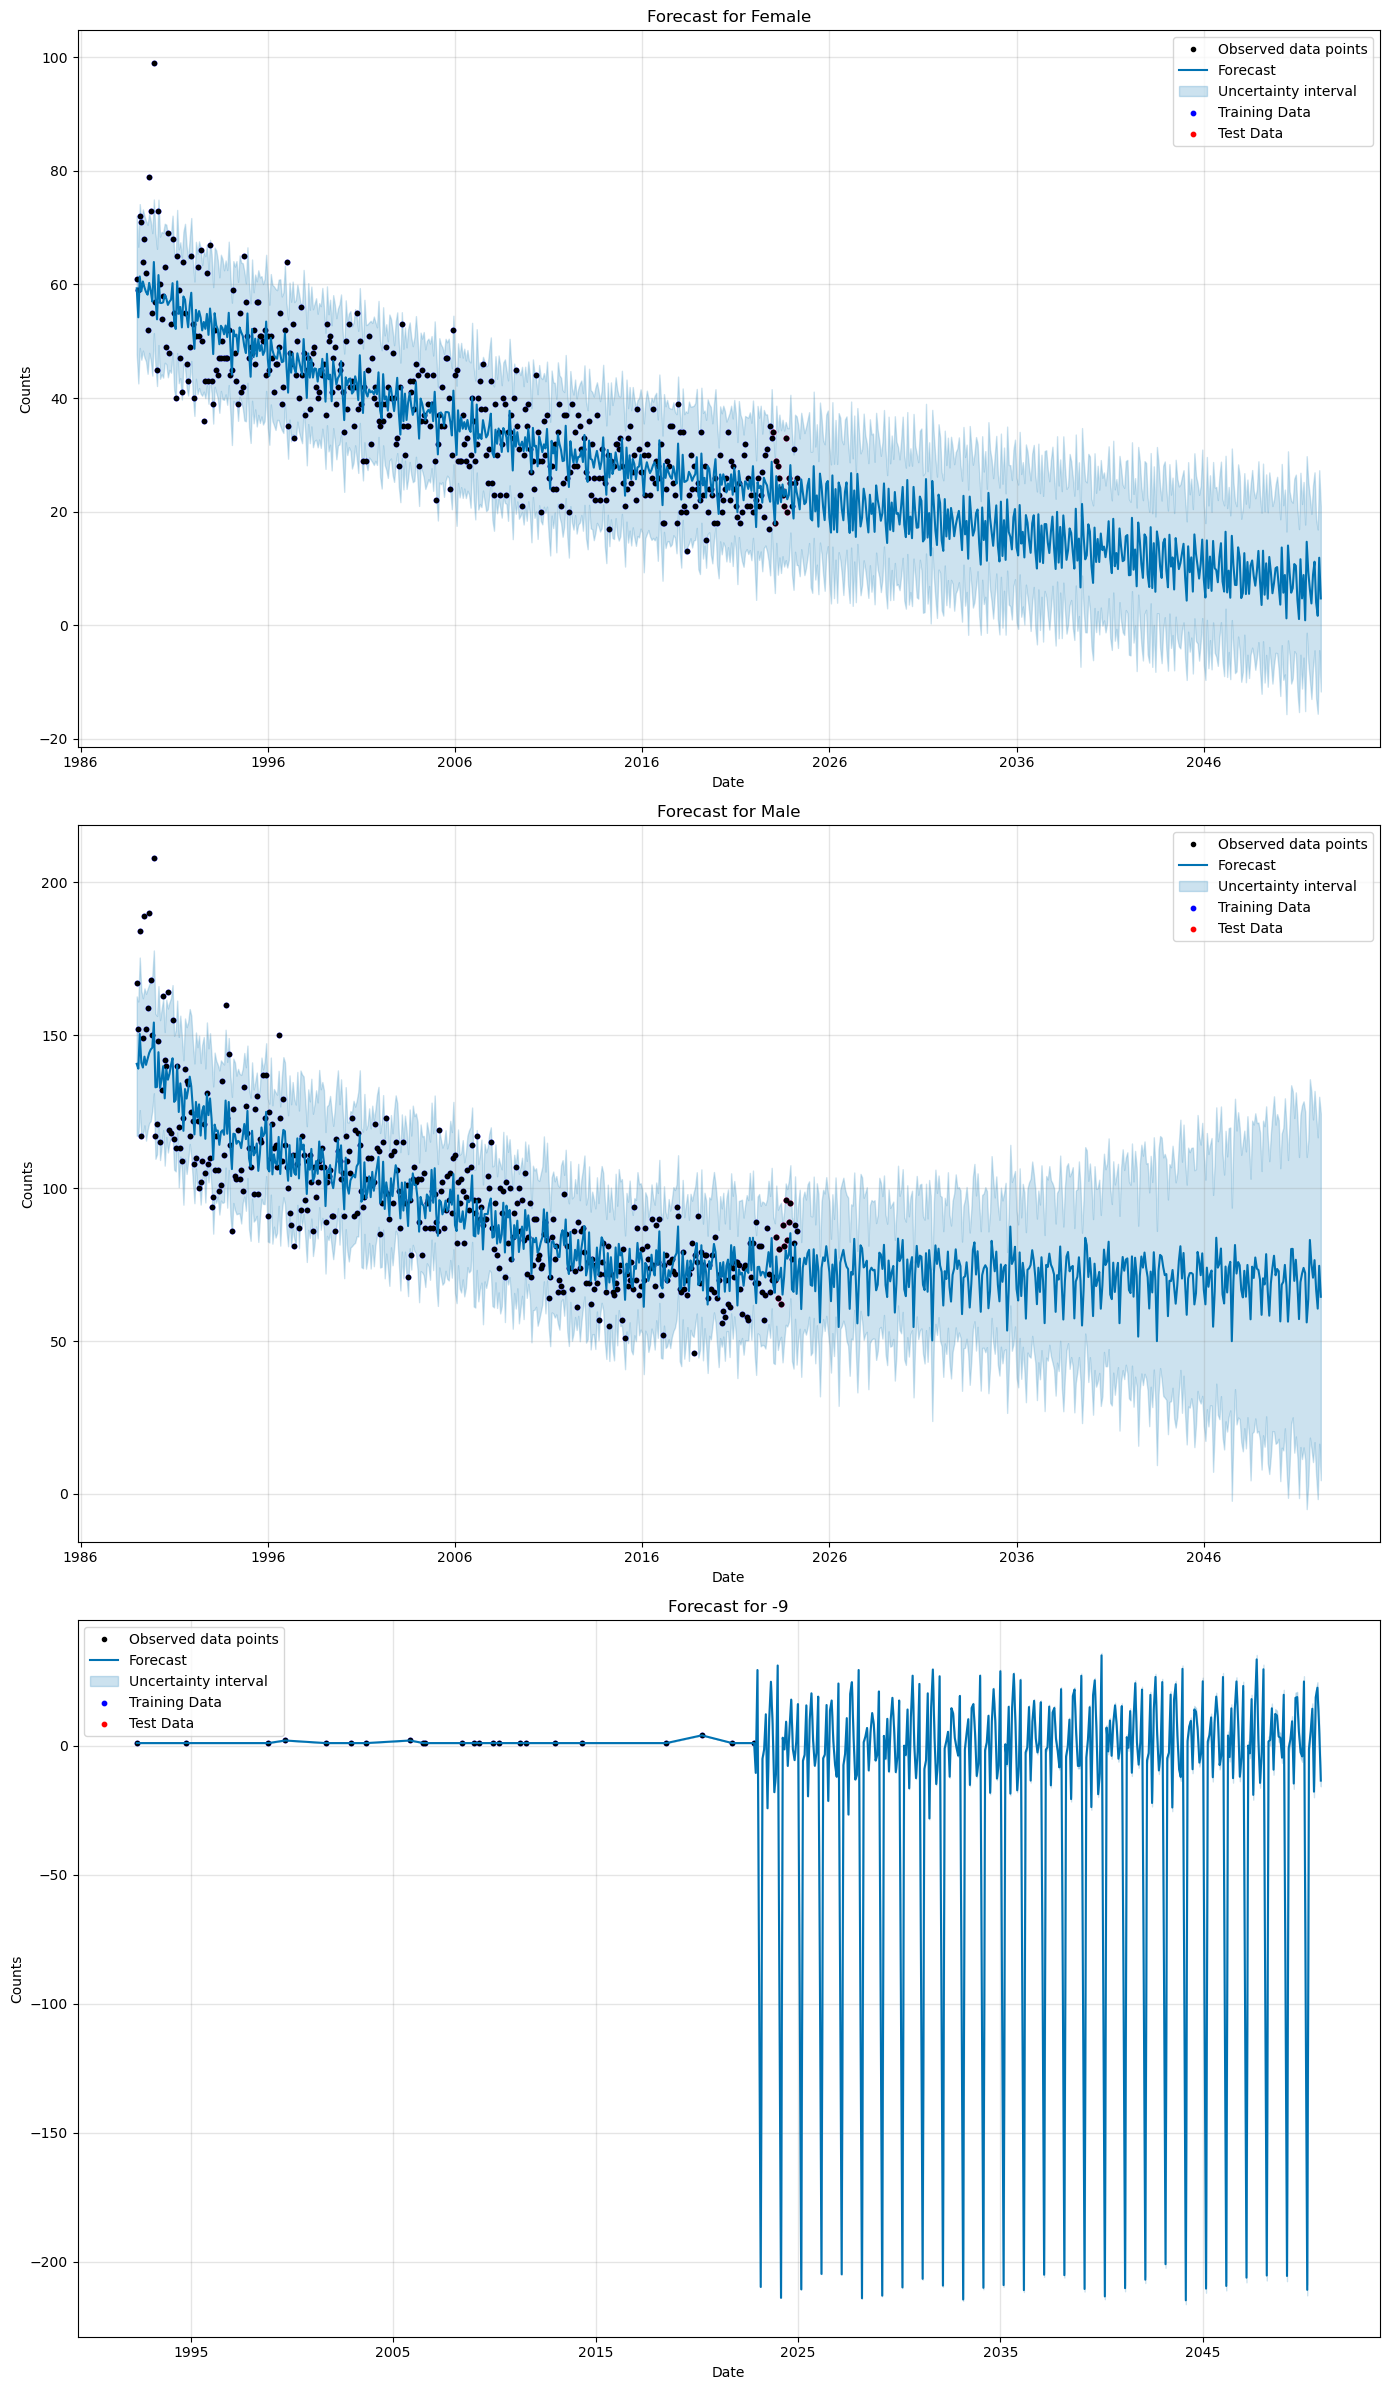

Dickey-Fuller Test Results:

Gender: Female
ADF Statistic: -2.9807540806938295
p-value: 0.036731237062611874
Critical Value 1%: -3.446599953548936
Critical Value 5%: -2.86870295908671
Critical Value 10%: -2.570585643956714

Gender: Male
ADF Statistic: -2.8478580015882753
p-value: 0.051756075125746856
Critical Value 1%: -3.446479704252724
Critical Value 5%: -2.8686500930967354
Critical Value 10%: -2.5705574627547096

Gender: -9
ADF Statistic: -5.020790110464023
p-value: 2.0183849012441588e-05
Critical Value 1%: -3.769732625845229
Critical Value 5%: -3.005425537190083
Critical Value 10%: -2.6425009917355373

Actual Counts per Year (2013-2023):
Year 2013: 1185 counts
Year 2014: 1149 counts
Year 2015: 1206 counts
Year 2016: 1293 counts
Year 2017: 1223 counts
Year 2018: 1134 counts
Year 2019: 1186 counts
Year 2020: 1093 counts
Year 2021: 1128 counts
Year 2022: 1179 counts
Year 2023: 1270 counts


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Filter data for 'Male' and 'Female' only
train_data = train_data[train_data['Gender'].isin(['Male', 'Female'])]
test_data = test_data[test_data['Gender'].isin(['Male', 'Female'])]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})
        
        # Skip if there are less than 2 non-NaN rows
        if value_data.shape[0] < 2:
            print(f"Skipping {value} due to insufficient data.")
            continue

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive')
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'Gender'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure there are actual counts for 2023
    if actual_counts_2023.shape[0] == 0:
        print(f"No actual data for {value} in 2023.")
        continue

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])
    r2 = r2_score(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%, R2: {r2:.2f}")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()

# Plot the forecasts
fig, axes = plt.subplots(nrows=len(forecasts), ncols=1, figsize=(14, 8*len(forecasts)))

for ax, (value, forecast) in zip(axes, forecasts.items()):
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
    train_time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    ax.scatter(train_time_data['Date'], train_time_data['Counts'], color='blue', s=10, label='Training Data')
    
    # Plot test data
    test_time_data = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    ax.scatter(test_time_data['Date'], test_time_data['Counts'], color='red', s=10, label='Test Data')
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot
fig.savefig(f'{feature}_forecast.png')

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\n{feature}: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[(data['Year'] == year) & (data['Gender'].isin(['Male', 'Female']))].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")


15:58:44 - cmdstanpy - INFO - Chain [1] start processing
15:58:44 - cmdstanpy - INFO - Chain [1] done processing
15:58:44 - cmdstanpy - INFO - Chain [1] start processing
15:58:44 - cmdstanpy - INFO - Chain [1] done processing


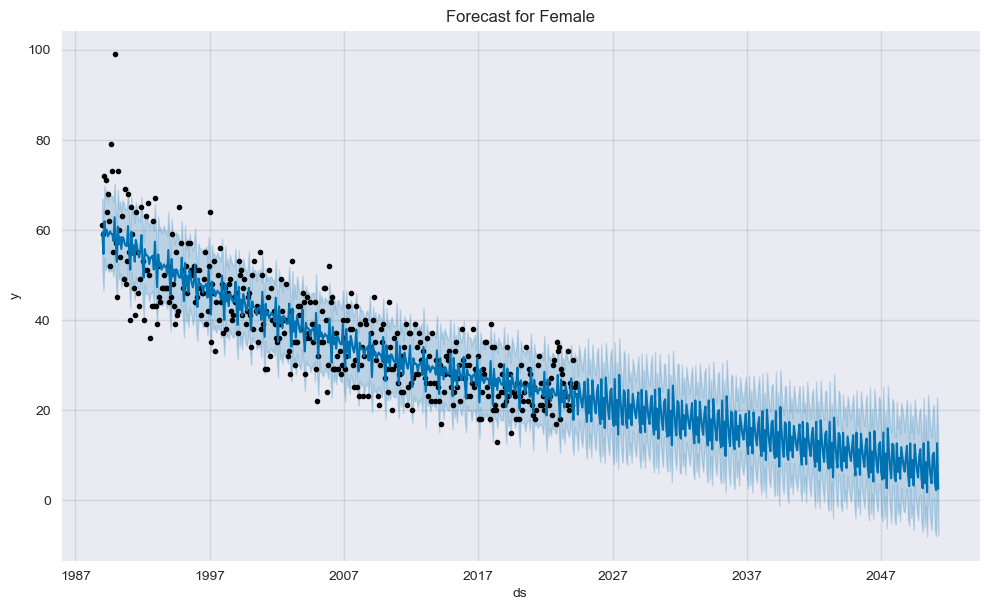

There are no forecasted dates when fatalities might reach zero for Female within the prediction range.

Predictions for Female for the first three months of 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  21.009835   12.956982   29.484453
421 2024-02-01  17.804730   10.058859   25.800635
422 2024-03-01  24.216171   16.198850   32.694479


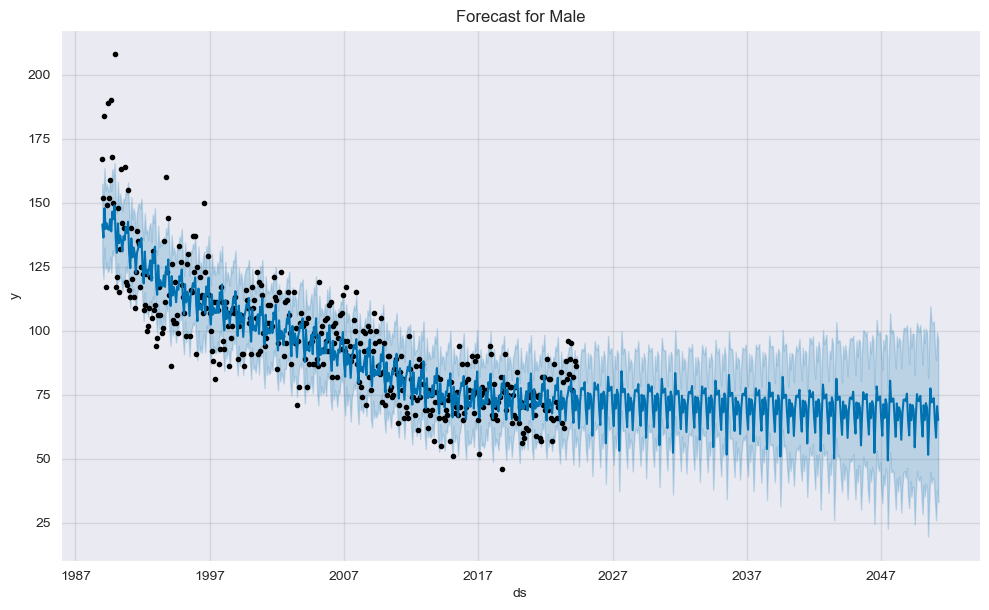

There are no forecasted dates when fatalities might reach zero for Male within the prediction range.

Predictions for Male for the first three months of 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  69.666488   53.383695   85.616683
421 2024-02-01  63.983374   47.549158   80.013234
422 2024-03-01  76.835681   61.645246   92.427301


In [13]:


df = data[['Year', 'Month', 'Gender']]
df = df[df['Gender'].isin(['Female', 'Male'])]

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

monthly_fatalities = df.groupby(['Date', 'Gender']).size().reset_index(name='Fatalities')

models = {}
forecasts = {}
valid_genders = ['Female', 'Male']

for gender in valid_genders:
    df_gender = monthly_fatalities[monthly_fatalities['Gender'] == gender][['Date', 'Fatalities']].rename(columns={'Date': 'ds', 'Fatalities': 'y'})
    
    
    model = Prophet(interval_width=0.8,
             yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False,changepoint_prior_scale=0.05,seasonality_prior_scale=10.0




)
    model.fit(df_gender)
    
    future = model.make_future_dataframe(periods=324, freq='M')  # Extend the dataframe to 2050 (324 months from 2024)
    
    forecast = model.predict(future)
    
     
    models[gender] = model
    forecasts[gender] = forecast

for gender in valid_genders:
    forecast = forecasts[gender]
    model = models[gender]
    
    model.plot(forecast)
    plt.title(f'Forecast for {gender}')
    plt.show()
    
    threshold = 1  # You can adjust this threshold as needed
    zero_fatality_date = forecast[forecast['yhat'] < threshold].head(1)['ds']
    if not zero_fatality_date.empty:
        print(f'The forecasted date when fatalities might reach zero for {gender} is: {zero_fatality_date.iloc[0]}')
    else:
        print(f'There are no forecasted dates when fatalities might reach zero for {gender} within the prediction range.')

    start_date = '2024-01-01'
    end_date = '2024-03-31'
    predictions_2024_q1 = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
    print(f'\nPredictions for {gender} for the first three months of 2024:')
    print(predictions_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])



In [47]:
# Filter the real data for the first three months of 2024
start_date_real = '2024-01-01'
end_date_real = '2024-03-31'

# Group by Date and Gender, and count the occurrences for the period 2024 Q1
real_fatalities_2024_q1 = monthly_fatalities[(monthly_fatalities['Date'] >= start_date_real) & (monthly_fatalities['Date'] <= end_date_real)]

print('Real fatalities for the first three months of 2024:')
print(real_fatalities_2024_q1)


Real fatalities for the first three months of 2024:
          Date  Gender  Fatalities
840 2024-01-01  Female          21
841 2024-01-01    Male          77
842 2024-02-01  Female          31
843 2024-02-01    Male          82
844 2024-03-01  Female          25
845 2024-03-01    Male          88


15:59:02 - cmdstanpy - INFO - Chain [1] start processing
15:59:02 - cmdstanpy - INFO - Chain [1] done processing
15:59:02 - cmdstanpy - INFO - Chain [1] start processing
15:59:02 - cmdstanpy - INFO - Chain [1] done processing


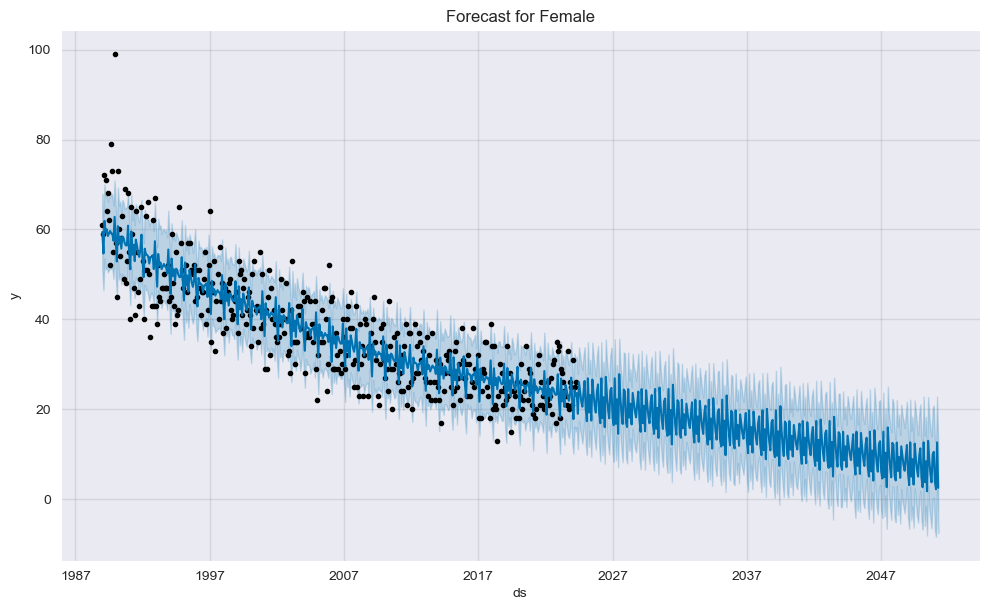

There are no forecasted dates when fatalities might reach zero for Female within the prediction range.

Predictions for Female for the first three months of 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  21.009835   12.380496   29.468070
421 2024-02-01  17.804730   10.102534   25.693487
422 2024-03-01  24.216171   16.164426   32.399780


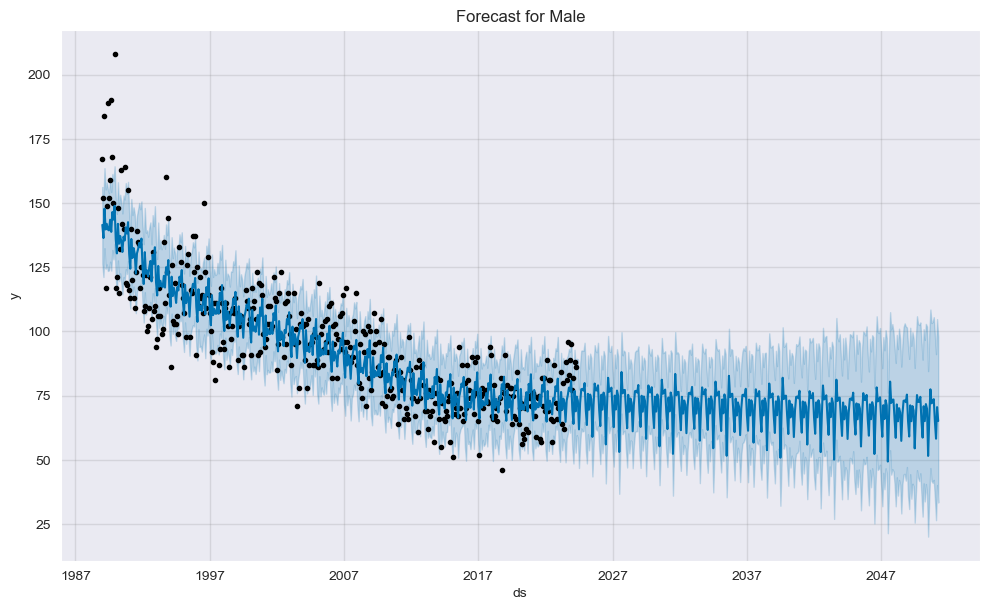

There are no forecasted dates when fatalities might reach zero for Male within the prediction range.

Predictions for Male for the first three months of 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  69.666488   54.266948   85.623500
421 2024-02-01  63.983374   48.543275   79.533939
422 2024-03-01  76.835681   61.814549   92.867748


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


df = data[['Year', 'Month', 'Gender']]
df = df[df['Gender'].isin(['Female', 'Male'])]

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

monthly_fatalities = df.groupby(['Date', 'Gender']).size().reset_index(name='Fatalities')

models = {}
forecasts = {}
valid_genders = ['Female', 'Male']

for gender in valid_genders:
    df_gender = monthly_fatalities[monthly_fatalities['Gender'] == gender][['Date', 'Fatalities']].rename(columns={'Date': 'ds', 'Fatalities': 'y'})
    
    model = Prophet(interval_width=0.8,
                    yearly_seasonality=True,
                    weekly_seasonality=False,
                    daily_seasonality=False,
                    changepoint_prior_scale=0.05,
                    seasonality_prior_scale=10.0)
    model.fit(df_gender)
    
    future = model.make_future_dataframe(periods=324, freq='M')  # Extend the dataframe to 2050 (324 months from 2024)
    
    forecast = model.predict(future)
    
    models[gender] = model
    forecasts[gender] = forecast

for gender in valid_genders:
    forecast = forecasts[gender]
    model = models[gender]
    
    model.plot(forecast)
    plt.title(f'Forecast for {gender}')
    plt.show()
    
    threshold = 1  # You can adjust this threshold as needed
    zero_fatality_date = forecast[forecast['yhat'] < threshold].head(1)['ds']
    if not zero_fatality_date.empty:
        print(f'The forecasted date when fatalities might reach zero for {gender} is: {zero_fatality_date.iloc[0]}')
    else:
        print(f'There are no forecasted dates when fatalities might reach zero for {gender} within the prediction range.')

    start_date = '2024-01-01'
    end_date = '2024-03-31'
    predictions_2024_q1 = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
    print(f'\nPredictions for {gender} for the first three months of 2024:')
    print(predictions_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


In [48]:
# Filter the real data for the first three months of 2024
start_date_real = '2024-01-01'
end_date_real = '2024-03-31'

# Group by Date and Gender, and count the occurrences for the period 2024 Q1
real_fatalities_2024_q1 = monthly_fatalities[(monthly_fatalities['Date'] >= start_date_real) & (monthly_fatalities['Date'] <= end_date_real)]

print('Real fatalities for the first three months of 2024:')
print(real_fatalities_2024_q1)


Real fatalities for the first three months of 2024:
          Date  Gender  Fatalities
840 2024-01-01  Female          21
841 2024-01-01    Male          77
842 2024-02-01  Female          31
843 2024-02-01    Male          82
844 2024-03-01  Female          25
845 2024-03-01    Male          88
